In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgbm

import optuna
from optuna import Trial, visualization

from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import KFold
import torch

In [143]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')
train_data_cat = pd.read_csv('dataset/train.csv')
test_data_cat = pd.read_csv('dataset/test.csv')

In [144]:
def heatmap(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title('Feature Correlation Heatmap')
    plt.show()

In [145]:
def feature_graph(data, column_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(len(data)), data, alpha=0.8)
    plt.title(f'Distribution of {column_name} in Coordinate Space')
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.show()

In [146]:
def compare_two_column(data1, data2, data1_name, data2_name):
    plt.figure(figsize=(10, 8))
    plt.scatter(data1, data2, c='blue', marker='o')
    plt.title(f'Scatter Plot of {data1_name} & {data2_name}')
    plt.xlabel(f'{data1_name}')
    plt.ylabel(f'{data2_name}')
    plt.grid(True)
    plt.show()

In [147]:
def plot_func(df, column, target):
    count_df = df.groupby([column, target]).size().unstack(fill_value=0)
    count_df = count_df.div(count_df.sum(axis=1), axis=0)
    count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 4))
    plt.xlabel(f'{column}')
    plt.ylabel('Proportion')
    plt.title(f'Proportion of Target by {column}')
    plt.legend(title='Target', loc='upper right')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i in range(count_df.shape[0]):
        for j in range(count_df.shape[1]):
            plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='black')


plt.show()

In [148]:
for col in train_data.columns :
    cnt = train_data[col].value_counts()
    print(f"{cnt}\n")

ID
TRAIN_40117    1
TRAIN_00000    1
TRAIN_00001    1
TRAIN_00002    1
TRAIN_00003    1
              ..
TRAIN_00025    1
TRAIN_00026    1
TRAIN_00027    1
TRAIN_00028    1
TRAIN_00029    1
Name: count, Length: 40118, dtype: int64

x_0
1.090381    1
1.006187    1
1.024647    1
1.062444    1
1.089189    1
           ..
1.059849    1
0.958394    1
1.053385    1
1.082756    1
0.986546    1
Name: count, Length: 40118, dtype: int64

x_1
-2.379771    1
-1.962566    1
-2.472625    1
-2.451003    1
-2.458470    1
            ..
-2.357835    1
-1.358775    1
-2.423492    1
-2.508423    1
-1.848146    1
Name: count, Length: 40118, dtype: int64

x_2
1.172301    1
1.247535    1
1.144386    1
1.186546    1
1.184531    1
           ..
1.133417    1
1.161564    1
1.190532    1
1.162428    1
1.230488    1
Name: count, Length: 40118, dtype: int64

x_3
0.847332    1
0.926500    1
0.846499    1
0.873599    1
0.810867    1
           ..
0.830036    1
0.942605    1
0.807843    1
0.796167    1
0.946963    1

In [149]:
# train_data.isnull().sum()

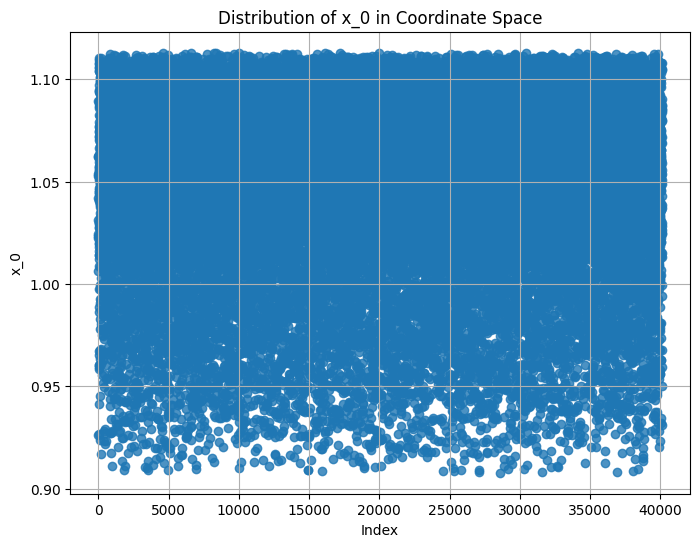

In [150]:
first_graph = feature_graph(train_data['x_0'], 'x_0')

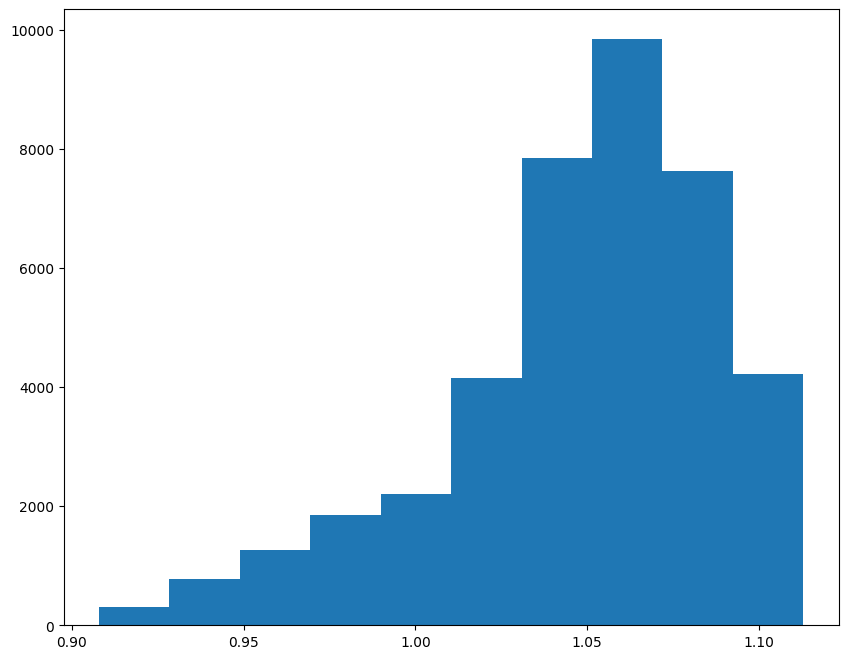

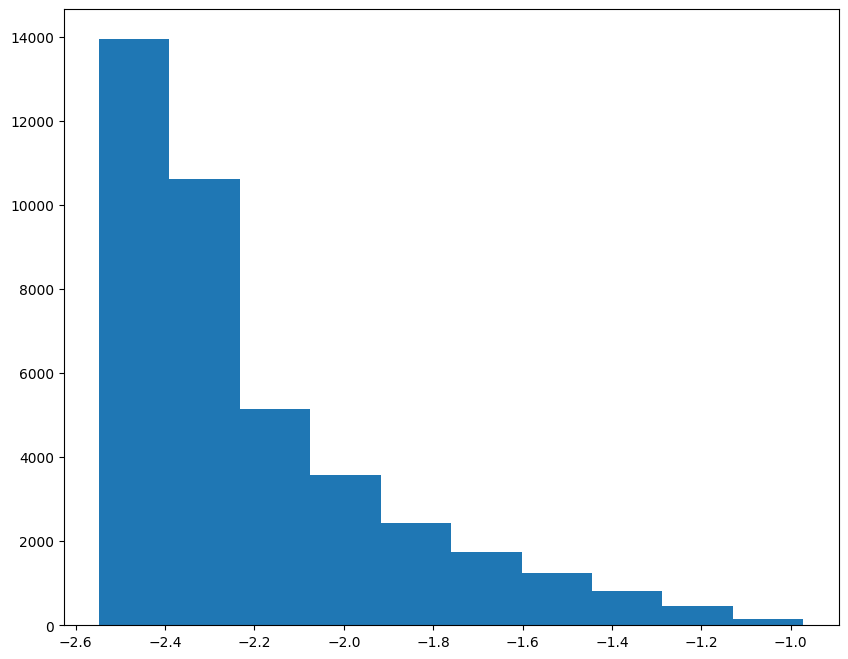

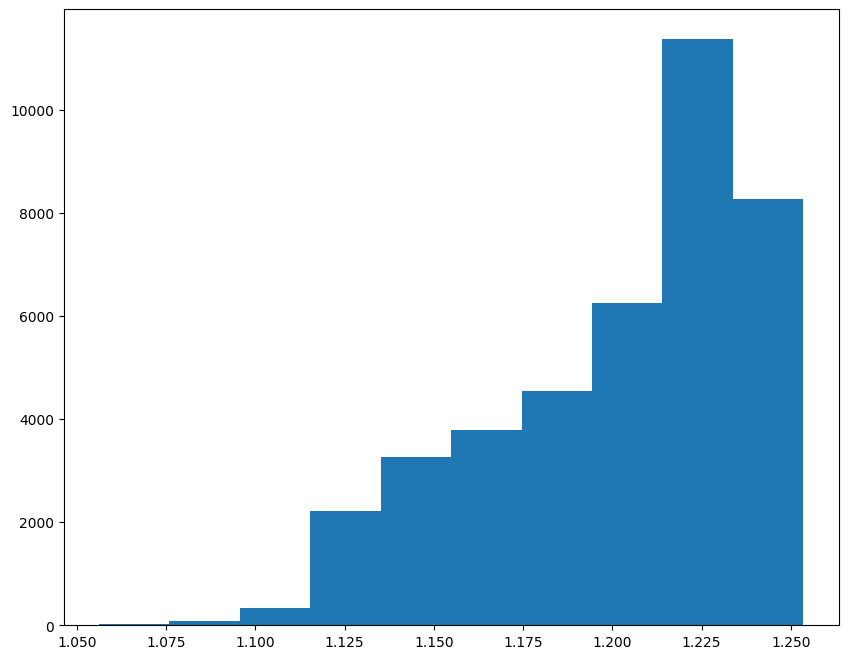

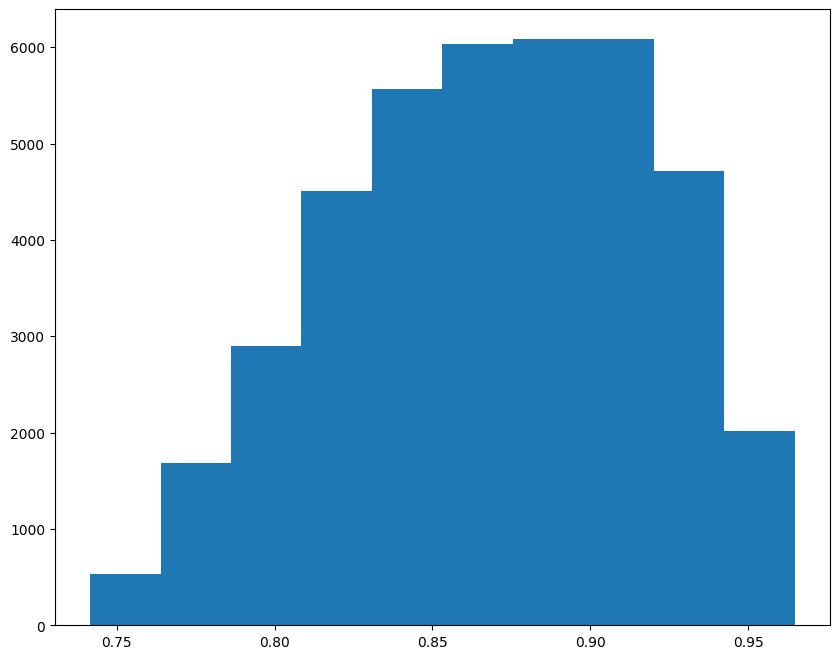

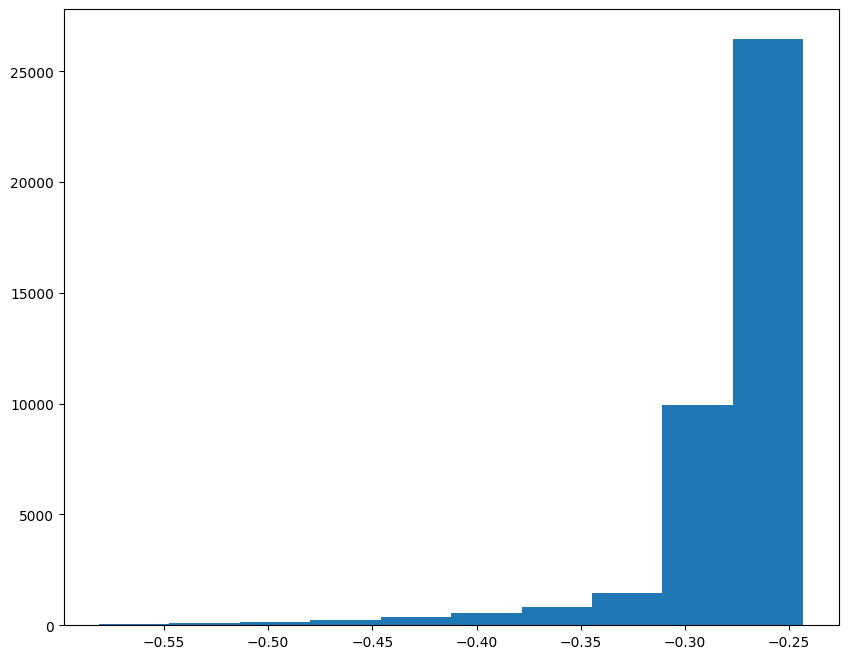

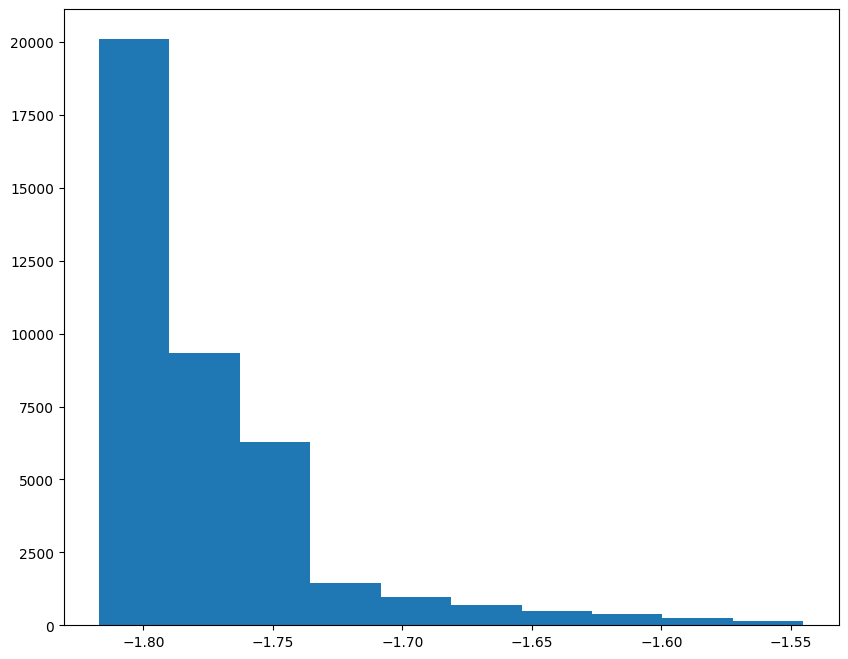

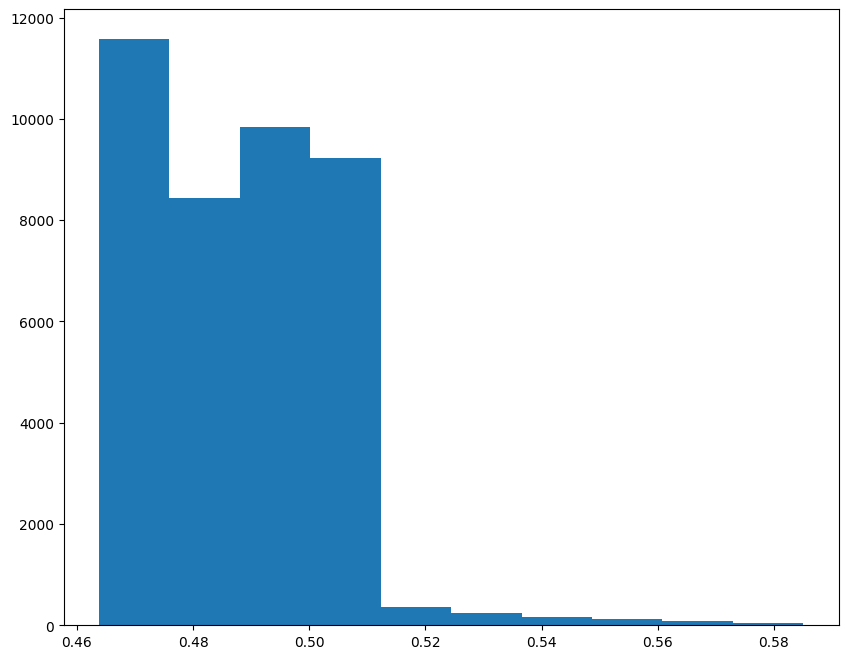

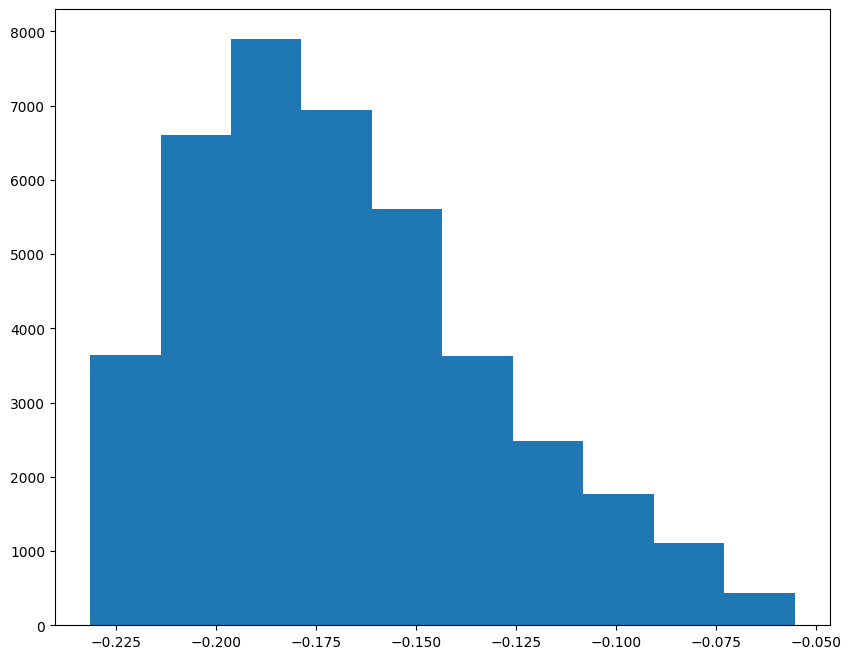

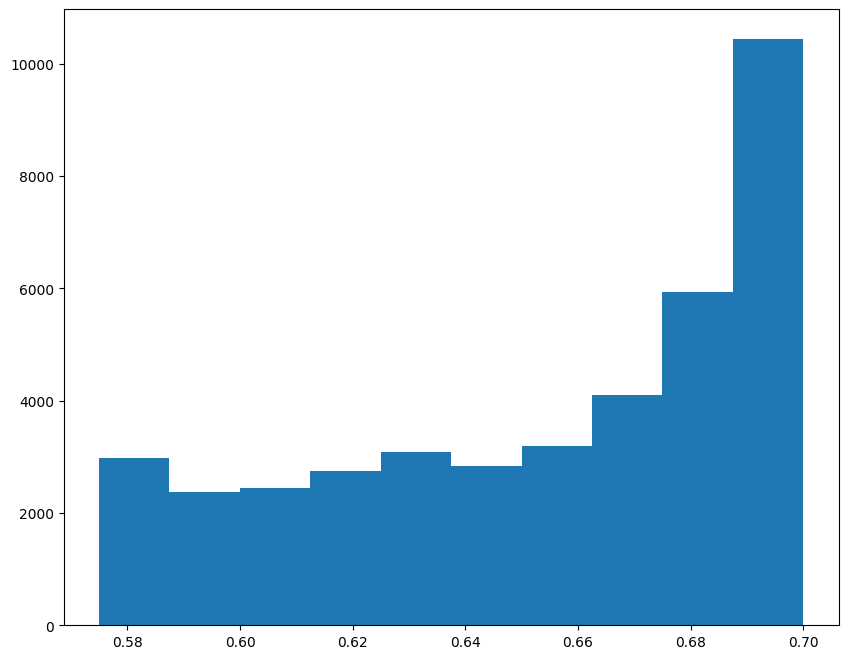

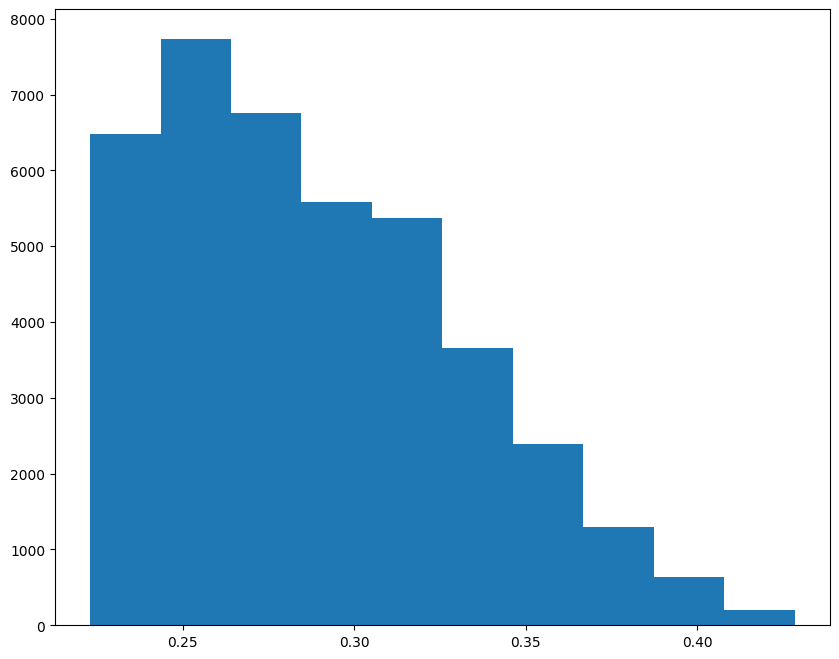

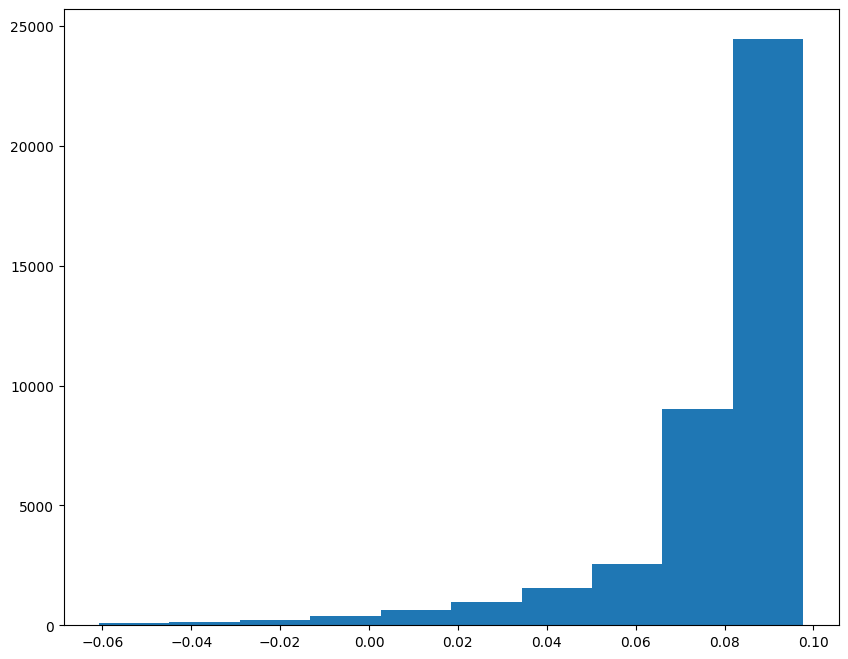

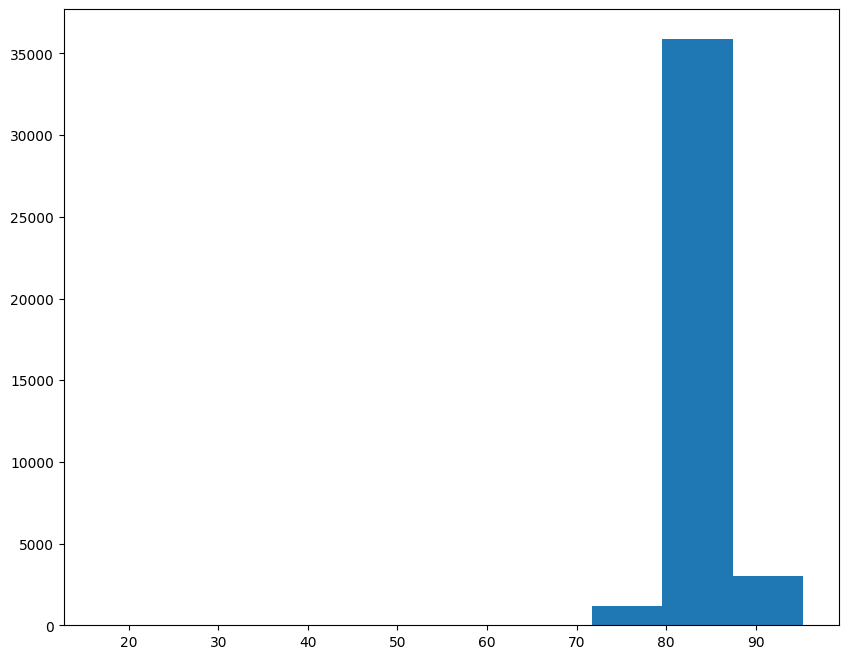

In [151]:
for col in train_data.columns:
    if col != 'ID':
        plt.figure(figsize=(10, 8))
        plt.hist(train_data[col])

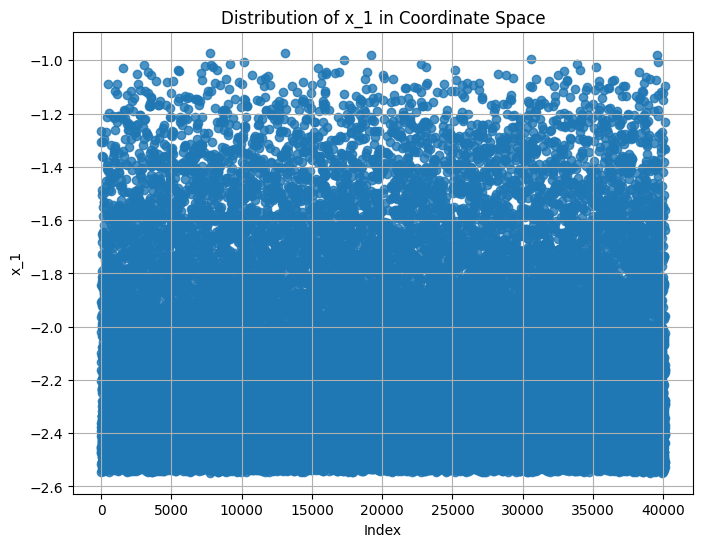

In [152]:
first_graph = feature_graph(train_data['x_1'], 'x_1')

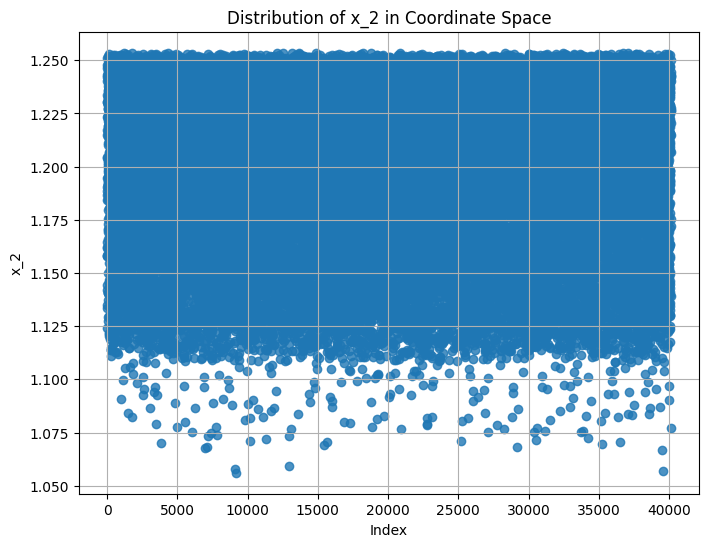

In [153]:
first_graph = feature_graph(train_data['x_2'], 'x_2')

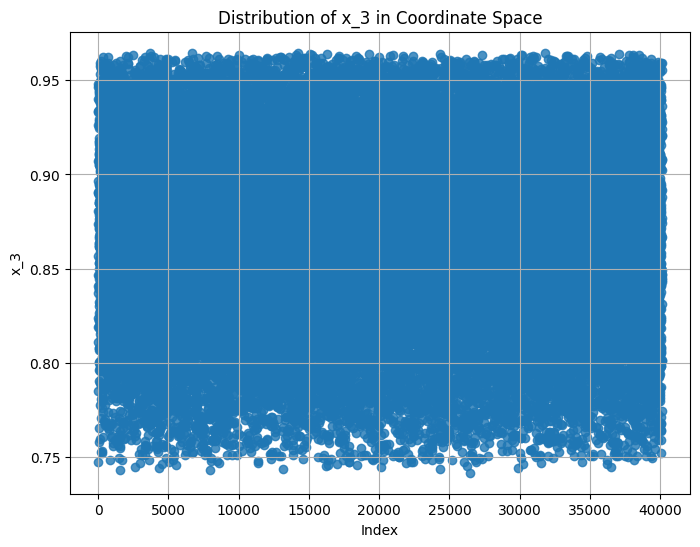

In [154]:
first_graph = feature_graph(train_data['x_3'], 'x_3')

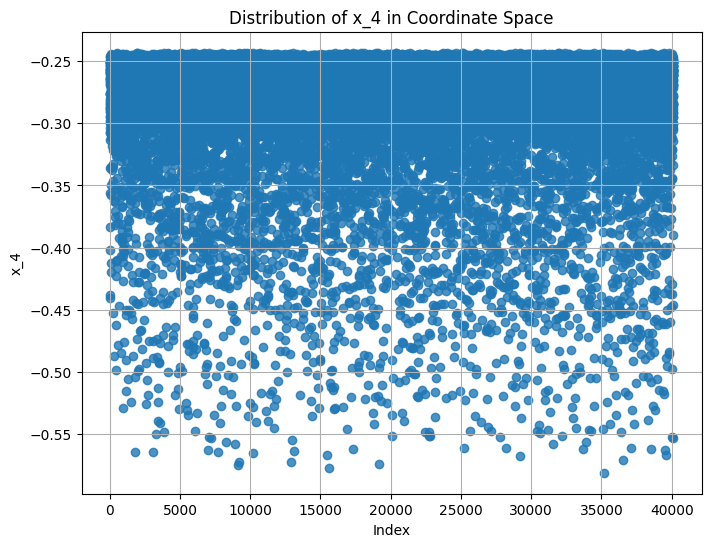

In [155]:
first_graph = feature_graph(train_data['x_4'], 'x_4')

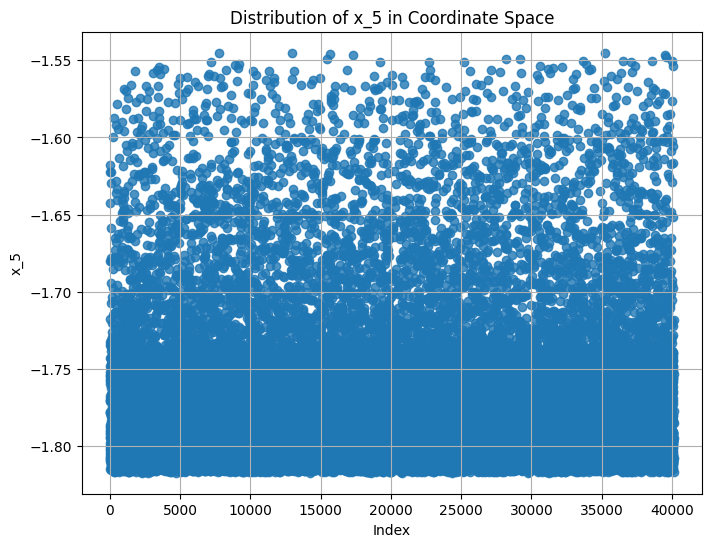

In [156]:
first_graph = feature_graph(train_data['x_5'], 'x_5')

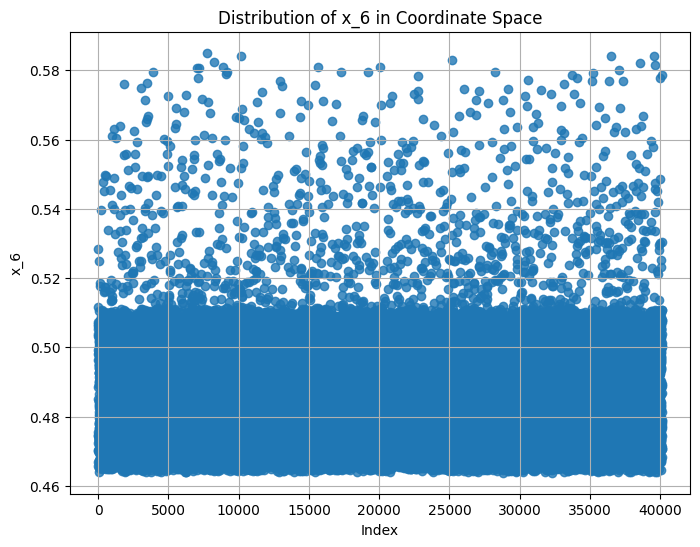

In [157]:
first_graph = feature_graph(train_data['x_6'], 'x_6')

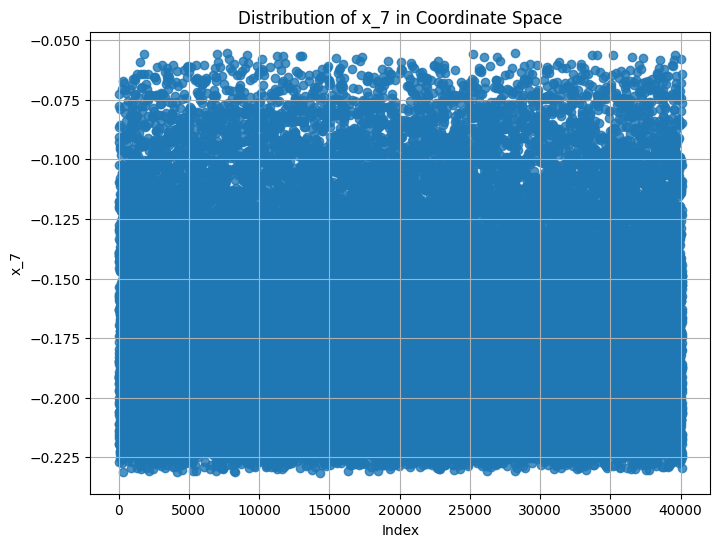

In [158]:
first_graph = feature_graph(train_data['x_7'], 'x_7')

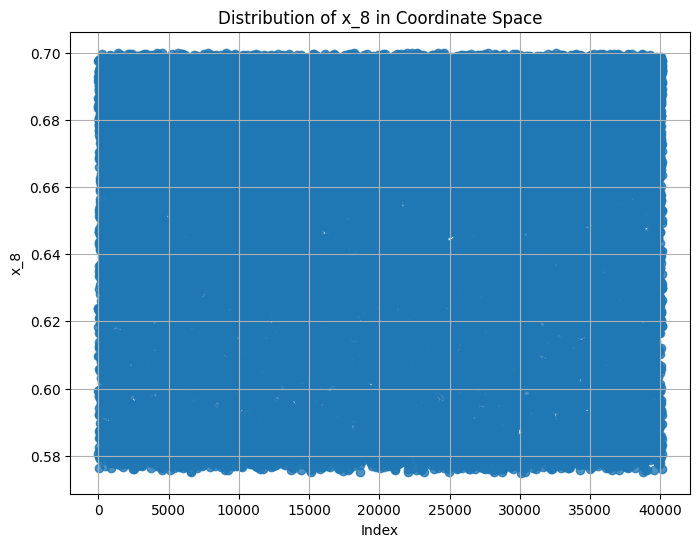

In [159]:
first_graph = feature_graph(train_data['x_8'], 'x_8')

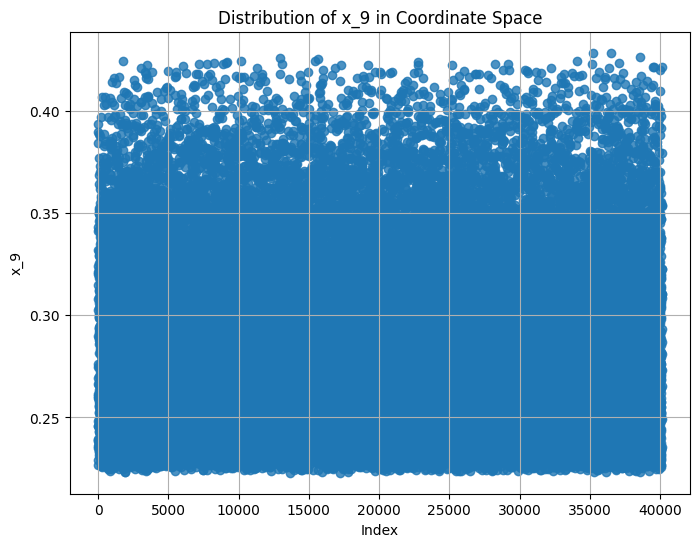

In [160]:
first_graph = feature_graph(train_data['x_9'], 'x_9')

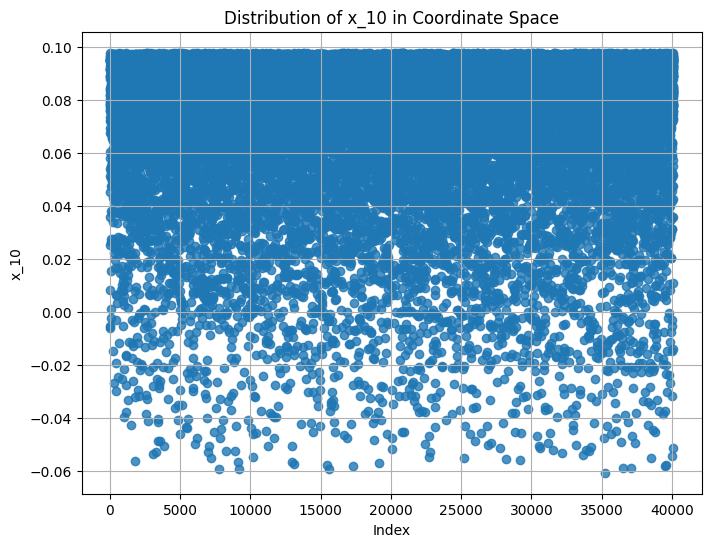

In [161]:
first_graph = feature_graph(train_data['x_10'], 'x_10')

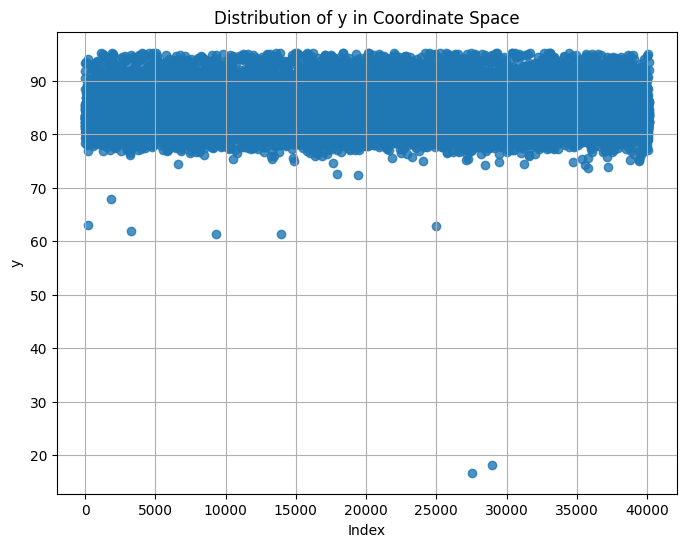

In [162]:
first_graph = feature_graph(train_data['y'], 'y')

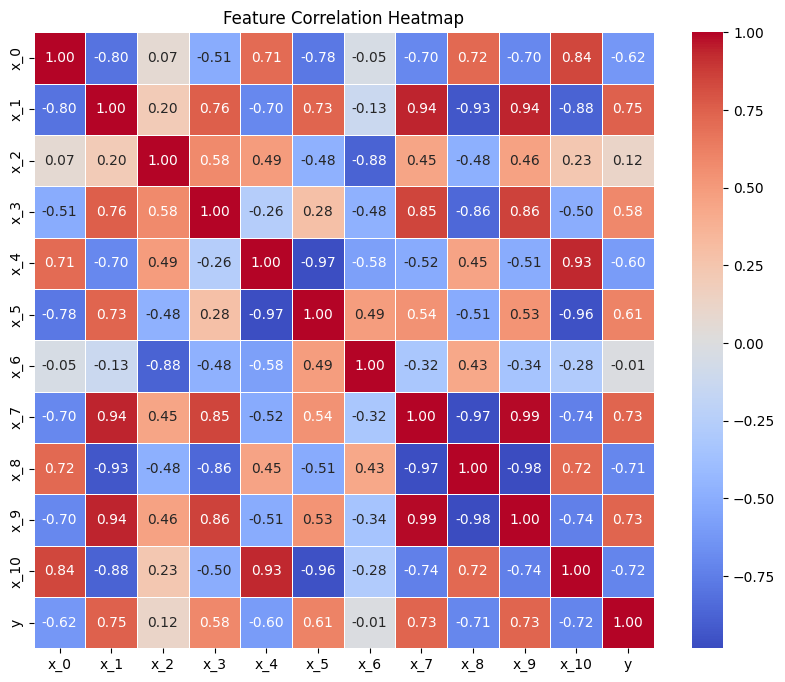

In [163]:
a = heatmap(train_data.iloc[:,1:])

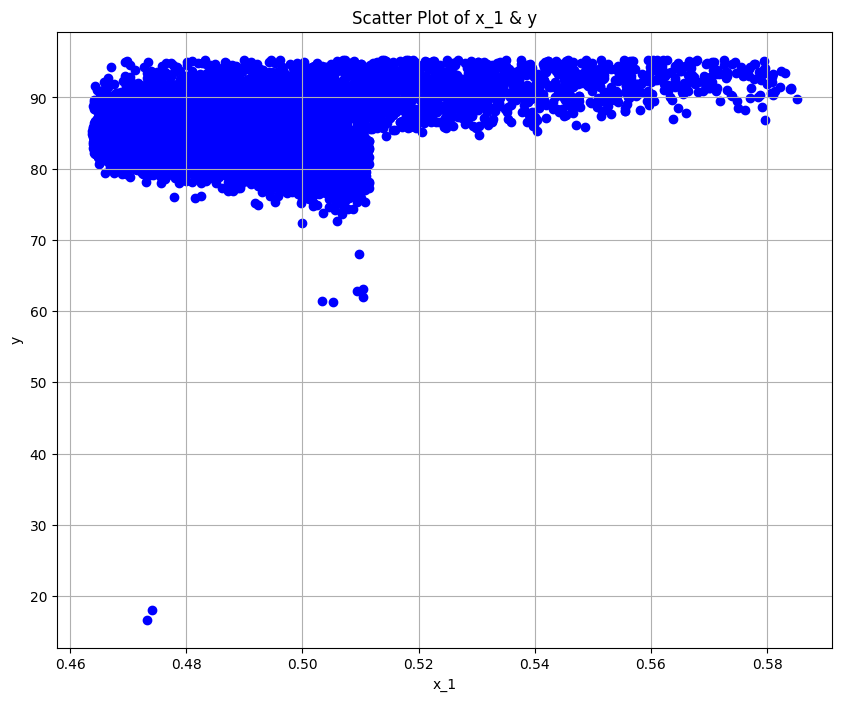

In [164]:
a = compare_two_column(train_data['x_6'], train_data['y'], 'x_1', 'y')

In [165]:
list = []

for i in range (100):
    list.append(i+1)

In [166]:
for col in train_data_cat.columns :
    if col == 'ID':
        continue
    elif col == 'y':
        continue
    else:
        train_data_cat[col] = pd.qcut(train_data_cat[col], q=100, labels=list)

In [167]:
for col in test_data_cat.columns :
    if col == 'ID':
        continue
    elif col == 'y':
        continue
    else:
        test_data_cat[col] = pd.qcut(test_data_cat[col], q=100, labels=list)

In [168]:
quantile_value = train_data_cat['y'].quantile(0.9)

In [169]:
quantile_value

86.5388330078125

In [170]:
train_data_cat['y'] = train_data_cat['y'].apply(lambda x: 1 if x >= quantile_value else 0)

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

RANDOM_STATE = 110
THRESHOLD = 0.5


def objectiveCatBoost(trial, x_tr, y_tr, x_val, y_val):
    
    param = {
        'iterations': trial.suggest_int('iterations', 800, 5000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        'depth': trial.suggest_int('depth', 4, 13),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 5),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10, log=True),
        'random_strength': trial.suggest_float('random_strength', 0, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 10),
        'border_count': trial.suggest_int('border_count', 128, 300),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        
        'random_seed': RANDOM_STATE,
        'eval_metric': 'F1',
        'logging_level': 'Silent',
        'boosting_type': 'Plain'
    }
    
    cat_features = []
    for i in x_tr.columns:
        cat_features.append(i)
    
    model = CatBoostClassifier(**param, cat_features=cat_features)
    model.fit(x_tr, y_tr)
    pred_proba = model.predict_proba(x_val)[:, 1]  # 양성 클래스 확률
    pred = (pred_proba >= THRESHOLD).astype(int)  # 스레드홀드에 따른 예측
    
    score = f1_score(y_val, pred, average="binary")
    
    return score

# 데이터셋 분할
x_train, x_val, y_train, y_val = train_test_split(
    train_data_cat.drop(["y","ID"], axis=1),  
    train_data_cat["y"],              
    test_size=0.2,
    shuffle=True,
    random_state=RANDOM_STATE,
)

# 하이퍼 파라미터 튜닝
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE))
study.optimize(lambda trial: objectiveCatBoost(trial, x_train, y_train, x_val, y_val), n_trials=100)

print('Best trial: score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))


[I 2024-09-03 14:11:05,992] A new study created in memory with name: no-name-85b32a09-ed1b-4cef-ab23-889970e6f7de
[I 2024-09-03 14:11:25,250] Trial 0 finished with value: 0.6897347174163783 and parameters: {'iterations': 1287, 'learning_rate': 0.13203262096748453, 'depth': 7, 'min_data_in_leaf': 4, 'l2_leaf_reg': 4.780689663026719, 'random_strength': 6.824631292225899, 'bagging_temperature': 9.554598960277284, 'border_count': 238, 'scale_pos_weight': 5.61649246971856, 'grow_policy': 'Depthwise'}. Best is trial 0 with value: 0.6897347174163783.
[I 2024-09-03 14:12:07,222] Trial 1 finished with value: 0.6937751004016064 and parameters: {'iterations': 1368, 'learning_rate': 0.0030110113610709835, 'depth': 8, 'min_data_in_leaf': 3, 'l2_leaf_reg': 1.0505036749294598, 'random_strength': 5.595100695350062, 'bagging_temperature': 0.8684052021612866, 'border_count': 198, 'scale_pos_weight': 3.8269447050797387, 'grow_policy': 'SymmetricTree'}. Best is trial 1 with value: 0.6937751004016064.
[I 2

KeyboardInterrupt: 

In [172]:
def fit_all_train_data_function(model_name, data, target_column='y', ID='ID', **params):
    # target_column이 data에 존재하는지 확인
    if target_column not in data.columns:
        raise ValueError(f"'{target_column}' 컬럼이 데이터프레임에 존재하지 않습니다.")
    
    # 범주형 피처 자동 선택 (데이터 타입이 'category' 또는 'object'인 경우)
    cat_features = [col for col in data.columns if data[col].dtype.name in ['category']]

    print(cat_features)
    
    # target_column을 제외한 학습 데이터 생성
    train_df = data.drop(columns=[target_column, ID], axis=1)
    
    # 모델 선택 및 하이퍼파라미터 설정
    model = CatBoostClassifier(**params, cat_features=cat_features)
    
    # 모델 학습
    model.fit(train_df, data[target_column])
    
    # 학습 완료 메시지 출력
    print(f'{model_name} 모델이 주어진 데이터로 학습 완료')
    
    return model  # 학습된 모델 반환


In [173]:
RANDOM_STATE = 110

In [174]:
# model_Dam = fit_all_train_data_function(
#     'cat', train_data_cat,
#     iterations = 4375, 
#     learning_rate = 0.010420215040093828, 
#     depth = 10, 
#     min_data_in_leaf = 3,
#     l2_leaf_reg = 1.1241408183988555,
#     random_strength = 7.071934739361616, 
#     bagging_temperature = 9.151169182653845, 
#     border_count = 128, 
#     scale_pos_weight = 3.103993405620786,
#     grow_policy = 'SymmetricTree',

#     random_state = RANDOM_STATE,
#     eval_metric = 'F1',
#     logging_level = 'Silent',
#     boosting_type = 'Plain'
# )

Trial 6 finished with value: 0.7354838709677419 and parameters: {'iterations': 4375, 'learning_rate': 0.010420215040093828, 'depth': 10, 'min_data_in_leaf': 3, 'l2_leaf_reg': 1.1241408183988555, 'random_strength': 7.071934739361616, 'bagging_temperature': 9.151169182653845, 'border_count': 128, 'scale_pos_weight': 3.103993405620786, 'grow_policy': 'SymmetricTree'}

In [175]:
param = {
    'iterations' : 4375, 
    'learning_rate' : 0.010420215040093828, 
    'depth' : 10, 
    'min_data_in_leaf' : 3,
    'l2_leaf_reg' : 1.1241408183988555,
    'random_strength' : 7.071934739361616, 
    'bagging_temperature' : 9.151169182653845, 
    'border_count' : 128, 
    'scale_pos_weight' : 3.103993405620786,
    'grow_policy' : 'SymmetricTree',

    'random_state' : RANDOM_STATE,
    'eval_metric' : 'F1',
    'logging_level' : 'Silent',
    'boosting_type' : 'Plain'
}

In [176]:
cat_features = [col for col in train_data_cat.columns if train_data_cat[col].dtype.name in ['category']]

train_df = train_data_cat.drop(columns=['ID', 'y'], axis=1)


model = CatBoostClassifier(**param, cat_features=cat_features)
model.fit(train_df, train_data_cat['y'])

In [202]:
df_test = test_data_cat.drop(columns=['ID'],axis=1)

preds = model.predict_proba(df_test)

In [203]:
pd_preds = pd.DataFrame(preds)

In [204]:
sum = 0

for i in pd_preds[1]:
    if i >= 0.5:
        sum = sum+1

In [206]:
pd_preds[1]

0       0.002658
1       0.000480
2       0.108197
3       0.072834
4       0.002084
          ...   
4981    0.000623
4982    0.321127
4983    0.000248
4984    0.000615
4985    0.000825
Name: 1, Length: 4986, dtype: float64

In [209]:
pd_preds[1] = pd_preds[1]*100

In [210]:
pd_preds[1]

0        0.265754
1        0.047971
2       10.819738
3        7.283389
4        0.208398
          ...    
4981     0.062317
4982    32.112682
4983     0.024813
4984     0.061457
4985     0.082455
Name: 1, Length: 4986, dtype: float64

In [211]:
submission = pd.read_csv('dataset/sample_submission.csv')

In [212]:
submission

,ID,y
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
4981,TEST_4981,0
4982,TEST_4982,0
4983,TEST_4983,0
4984,TEST_4984,0


In [213]:
submission['y'] = pd_preds[1]

In [214]:
submission

,ID,y
0,TEST_0000,0.265754
1,TEST_0001,0.047971
2,TEST_0002,10.819738
3,TEST_0003,7.283389
4,TEST_0004,0.208398
...,...,...
4981,TEST_4981,0.062317
4982,TEST_4982,32.112682
4983,TEST_4983,0.024813
4984,TEST_4984,0.061457


In [215]:
submission.to_csv("submission.csv", index=False)